Author: Lee Clemmer

# Introduction

In this notebook we'll explore the Ames, Iowa Housing Dataset, prepared by Dean De Cock, and described in the paper *[Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)*.

We start by conducting some exploratory data analysis followed by processing the data based on our findings. The goal is ultimately to accurately predict the sales price of houses in the test set given the data in the training set.

# <p id="db"> Discussion and Background </p>
* [Original dataset](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt)
* [Dataset documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)

From the documentation, we learn that the there are **2,930 observations** and **82 variables**, two of which (Order and Parcel ID) are not included in the dataset given in this competition. 

The properties were sold in Ames, IA from 2006 to 2010. 
Before we dive into the variables, let's look at the *Special Notes* section of the documentation, which informs us: 
> There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.

Let's be sure to check out these outliers and consider whether we want to in fact exclude any houses bigger than 4,000 sq ft.

# <p id="intuition"> Intuition: getting to know the data</p>
Before we start our more rigorous analysis, let's start by familiarizing ourselves with the data first. We don't need to look at every feature (yet), but getting a feel for some features that are immediately relevant to us may help us build some intuition and generate ideas or questions.

In [0]:
# Imports
import math

import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
ls

codeit1.csv  codeit2.csv  codeit3.csv  gdrive/  sample_data/


In [0]:
# Let's get some data
train = pd.read_csv('/content/gdrive/My Drive/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/test.csv')

In [0]:
train=train.iloc[:400000,:]


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting library
import missingno as msno # plotting missing data
import seaborn as sns # plotting library
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import Imputer #for handling missing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
dataset=train


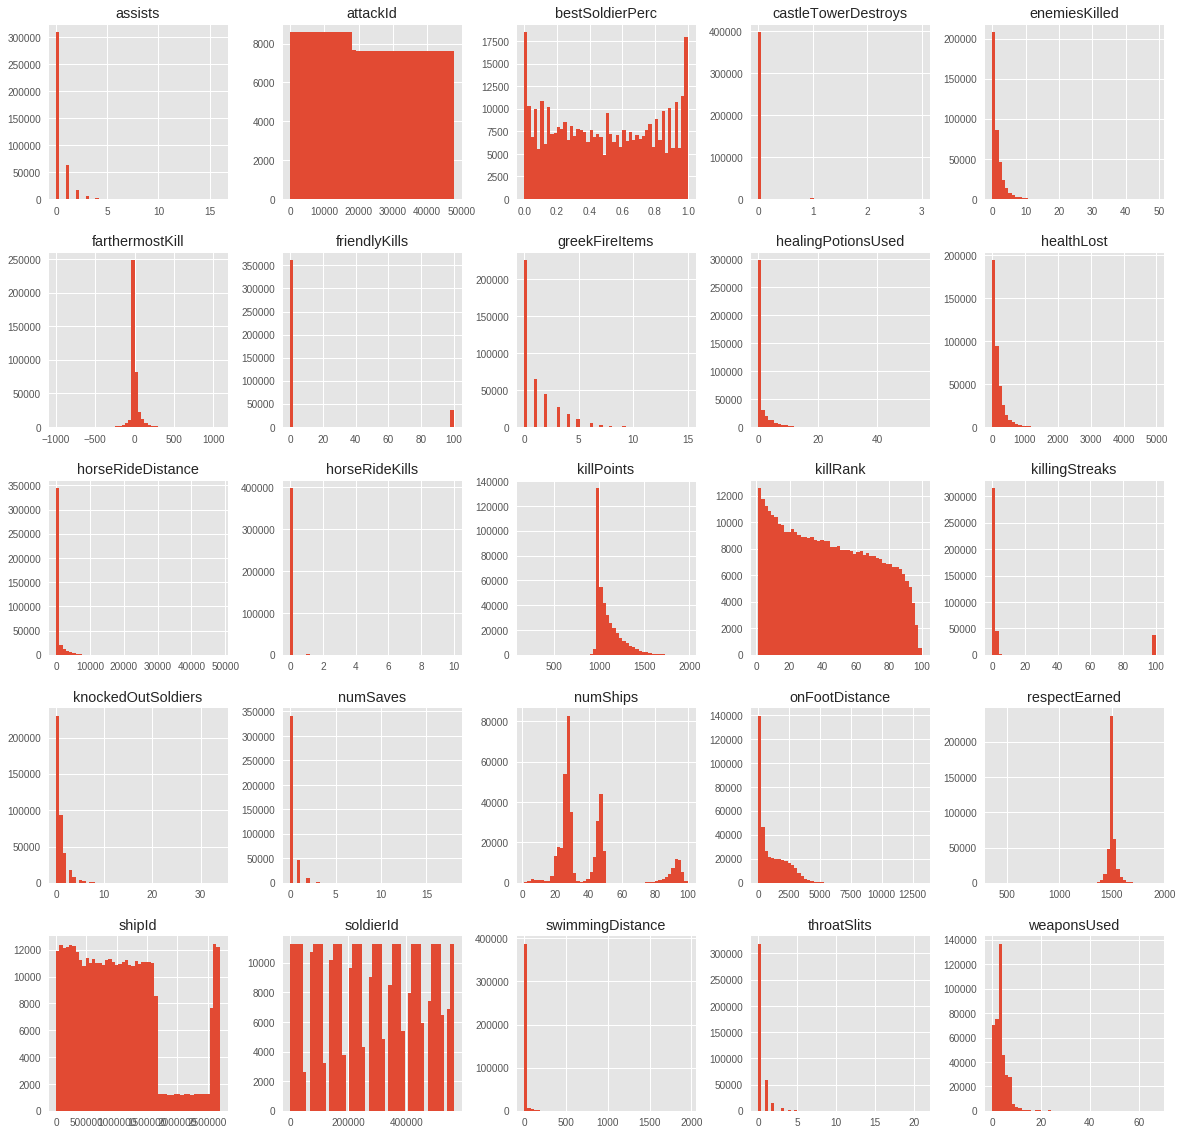

In [61]:
#setup  Matplotlib (magic function) . Plots will render within the notebook itself
%matplotlib inline  
dataset.hist(bins = 50 , figsize = (20,20))
plt.show()


In [62]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1] #Dependant Varible
X.head() #show first 5 records

,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,...,numShips,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned
0,0.0,24.0,0.0,0.0,5.0,247.30,2.0,0.0,4.0,17.0,...,28.0,1.0,591.3,0.0,0.0,0.0,0.0,782.40,4.0,1458.0
1,1.0,440875.0,1.0,1.0,0.0,37.65,1.0,1.0,0.0,45.0,...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,119.60,3.0,1511.0
2,2.0,878242.0,2.0,0.0,1.0,93.73,1.0,0.0,2.0,54.0,...,28.0,1.0,0.0,0.0,0.0,0.0,0.0,3248.00,5.0,1583.0
3,3.0,1319841.0,3.0,0.0,0.0,95.88,0.0,0.0,0.0,86.0,...,94.0,0.0,0.0,0.0,0.0,0.0,0.0,21.49,1.0,1489.0
4,4.0,1757883.0,4.0,0.0,1.0,0.00,0.0,0.0,1.0,58.0,...,41.0,0.0,0.0,0.0,0.0,0.0,0.0,640.80,4.0,1475.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [0]:
# rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
# rf_regressor.fit(X_train,y_train)

# #Predicting the SalePrices using test set 
# y_pred_rf = rf_regressor.predict(X_test)

# #Random Forest Regression Accuracy with test set
# print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(X_train, y_train)

# transform the validation dataset
# rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
print (mean_squared_error(y_test, predictions))

0.01045983221578926


In [0]:
# scaler = StandardScaler().fit(test)
# rescaled_X_train = scaler.transform(test)
# model = GradientBoostingRegressor(random_state=21, n_estimators=400)
# model.fit(rescaled_X_train, y_train)

# transform the validation dataset
test = pd.read_csv('/content/gdrive/My Drive/test.csv')
test=test.iloc[:,2:]
# rescaled_X_test1 = scaler.transform(test)
predictions = model.predict(test)
# print (mean_squared_error(y_test, predictions))

In [66]:
predictions
y_pred3=list(predictions)
len(y_pred3)

13716

In [67]:
df_test2=list(test['soldierId'].astype(int))
len(df_test2)

13716

In [0]:
final = pd.DataFrame({'soldierId': df_test2,'bestSoldierPerc': y_pred3})

In [0]:
final.to_csv('codeit4.csv')

In [0]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))


In [0]:
print (mean_squared_error(y_test, y_pred_rf))